In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
import matplotlib_inline
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.font_manager as fm
from collections import Counter

In [4]:
df = pd.read_csv('./CrawledData/ㅇㅈㅁ/ㅇㅈㅁ_unsmile.csv',encoding='utf-8')

In [5]:
label = ['여성/가족', '남성', '성소수자', '인종/국적', '연령', '지역', '종교', '기타 혐오', '악플/욕설', 'clean']

In [6]:
stats = []
for i in label:
    stats.append(df[i].sum())

In [7]:
plt.rcParams['font.family'] = "NanumGothic"
plt.rcParams['axes.unicode_minus'] = False

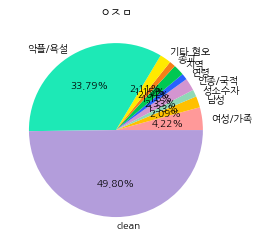

In [8]:
#wedgeprops={'width': 0.5, 'edgecolor': 'w', 'linewidth': 2}
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#2962FF', '#00c853', '#f57f17', '#ffea00', '#1De9B6', '#b39ddb']
plt.axis=('equal')
plt.title('ㅇㅈㅁ')
plt.pie(stats, labels=label, autopct='%.2f%%', colors=colors)
plt.show()

In [9]:
# 카테고리별로 점수가 높은 순서대로 정렬
df_woman = df.sort_values(by='여성/가족', ascending=False).groupby('text').head(10)
df_man = df.sort_values(by='남성', ascending=False).groupby('text').head(10)
df_region = df.sort_values(by='지역', ascending=False).groupby('text').head(10)
df_queer = df.sort_values(by='성소수자', ascending=False).groupby('text').head(10)
df_religion = df.sort_values(by='종교', ascending=False).groupby('text').head(10)

In [10]:
df_woman.head(20)

,text,label,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
942,대통령 ㅇㅈㅁ 투표해야할거같음 마음같아서는 ㅅㅅㅈ인데 진짜 여가부폐지무지성놈들 때문...,0,0.90,0.02,0.03,0.03,0.02,0.02,0.01,0.09,0.08,0.06
1288,이래도 페미가 ㅇㅈㅁ을 찍는다는 개소리 해라,0,0.89,0.03,0.02,0.02,0.02,0.03,0.02,0.04,0.10,0.06
479,리 그래도 트위터 자칭 페미들은 ㅇㅈㅁ을 찍는다잖아요 ㅋㅋ 웃어야 할 지 울어야 할 지,0,0.89,0.03,0.01,0.03,0.02,0.02,0.02,0.03,0.06,0.07
178,페미가 안철수를 지지한다면 이해하겠는데 ㅇㅈㅁ을 지지한다는 건 그냥 성별만 여성일 ...,0,0.87,0.02,0.02,0.02,0.01,0.01,0.01,0.04,0.09,0.10
661,저 소신 투표 심 하려다가 맘 바꿔먹었잖아요 윤 되면 한녀들 단체로 망할거 뻔해서 ...,0,0.87,0.08,0.01,0.03,0.02,0.01,0.01,0.02,0.05,0.08
2179,ㅇㅈㅁ이 진짜 좋아서 찍는 한녀가 몇이나 되겠노 그냥 다 저새끼들만은 떨궈야한다는 ...,0,0.86,0.12,0.01,0.03,0.01,0.01,0.02,0.02,0.06,0.03
1265,그래도 말은 통하는 여학우 only vs ㅇㅈㅁ지지자는 대가리깨진놈들이며 남자의 청...,0,0.85,0.01,0.02,0.03,0.03,0.03,0.02,0.14,0.12,0.06
783,이번 대선 최선의 시나리오는 여자들이 싫어도 ㅇㅈㅁ한테 전략투표 해서 여자표 못받으...,0,0.85,0.04,0.01,0.02,0.01,0.02,0.01,0.03,0.10,0.09
2446,투표권 가지고 있는티 있는 힘껏 내야지 ㅇㅅㅇ봐 ㅇㅈㅁ이 여자들 지지받아서 지지율 ...,0,0.84,0.03,0.01,0.03,0.02,0.01,0.01,0.03,0.09,0.11
633,ㅇㅈㅁ 뽑아야 한다는 트페미 들 다수가 실제로는 투표권 없는 10대일 수도 그냥 ㅇ...,0,0.83,0.03,0.02,0.02,0.02,0.01,0.01,0.06,0.12,0.10


In [17]:
df_man.head(20)

,text,label,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
1507,엄마가 ㅇㅈㅁ 진짜 싫어하시는데 자세한 이유를 듣고 고민했으나 최근에 들은 ㅇㅅㅇ ...,1,0.06,0.92,0.02,0.04,0.03,0.02,0.02,0.02,0.05,0.05
1112,ㅇㅈㅁ 한남문학 대가였네,0,0.04,0.92,0.01,0.04,0.03,0.03,0.02,0.01,0.06,0.05
2126,ㅇㅈㅁ은 진짜 최선을 다하고 있다 그니까 도태되기 싫으면 이번남들 정신 차리고 가서...,1,0.03,0.91,0.02,0.04,0.02,0.02,0.01,0.02,0.08,0.05
1040,ㅇㅅㅇ ㅇㅈㅅ 너무너무 시바 치가떨리게싫고 욕나옥역갸워서 ㅇㅈㅁ뽑을까고민중야진심 여...,0,0.05,0.89,0.03,0.03,0.02,0.02,0.01,0.02,0.08,0.05
1191,감성불륜남ㅇㅈㅁ,1,0.03,0.88,0.02,0.07,0.02,0.03,0.01,0.02,0.06,0.08
1542,남자들 남혐 오지더라 ㅇㅈㅁ 갤러리에서 펨코남들 보고 육수가 흐른다고 하는데 기절함...,0,0.08,0.86,0.03,0.04,0.01,0.01,0.01,0.01,0.08,0.09
841,여성분들이 살기 위해서라면 흩어지지 말고 뭉쳐야합니다 다시한번 말씀드리지만 이번만 ...,0,0.15,0.85,0.02,0.04,0.05,0.02,0.01,0.03,0.03,0.05
146,나 왠지는 모르겄지만 게임만 하면 공주 요정 캐들만 잡는디 ex ㄷㄹㄱ ㅍㄹㅇㅌ ㅍ...,0,0.04,0.84,0.02,0.09,0.02,0.02,0.01,0.01,0.07,0.07
1172,#자캐 이거 칠때마다 제일 위에 자캐는 ㅇㅈㅁ 찍나 ㅎㄱㅇ 찍나 이거 뜨는데 거슬려...,0,0.06,0.84,0.03,0.05,0.01,0.02,0.01,0.01,0.10,0.04
2117,2번남 이후 ㅇㅈㅁ갤 구경중인데 트민남들 진짜 문제네 올려치기는 아니고 다 저런 줄...,0,0.03,0.81,0.03,0.34,0.02,0.02,0.01,0.02,0.05,0.04


In [12]:
df_man.head(20)

,text,label,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
1507,엄마가 ㅇㅈㅁ 진짜 싫어하시는데 자세한 이유를 듣고 고민했으나 최근에 들은 ㅇㅅㅇ ...,1,0.06,0.92,0.02,0.04,0.03,0.02,0.02,0.02,0.05,0.05
1112,ㅇㅈㅁ 한남문학 대가였네,0,0.04,0.92,0.01,0.04,0.03,0.03,0.02,0.01,0.06,0.05
2126,ㅇㅈㅁ은 진짜 최선을 다하고 있다 그니까 도태되기 싫으면 이번남들 정신 차리고 가서...,1,0.03,0.91,0.02,0.04,0.02,0.02,0.01,0.02,0.08,0.05
1040,ㅇㅅㅇ ㅇㅈㅅ 너무너무 시바 치가떨리게싫고 욕나옥역갸워서 ㅇㅈㅁ뽑을까고민중야진심 여...,0,0.05,0.89,0.03,0.03,0.02,0.02,0.01,0.02,0.08,0.05
1191,감성불륜남ㅇㅈㅁ,1,0.03,0.88,0.02,0.07,0.02,0.03,0.01,0.02,0.06,0.08
1542,남자들 남혐 오지더라 ㅇㅈㅁ 갤러리에서 펨코남들 보고 육수가 흐른다고 하는데 기절함...,0,0.08,0.86,0.03,0.04,0.01,0.01,0.01,0.01,0.08,0.09
841,여성분들이 살기 위해서라면 흩어지지 말고 뭉쳐야합니다 다시한번 말씀드리지만 이번만 ...,0,0.15,0.85,0.02,0.04,0.05,0.02,0.01,0.03,0.03,0.05
146,나 왠지는 모르겄지만 게임만 하면 공주 요정 캐들만 잡는디 ex ㄷㄹㄱ ㅍㄹㅇㅌ ㅍ...,0,0.04,0.84,0.02,0.09,0.02,0.02,0.01,0.01,0.07,0.07
1172,#자캐 이거 칠때마다 제일 위에 자캐는 ㅇㅈㅁ 찍나 ㅎㄱㅇ 찍나 이거 뜨는데 거슬려...,0,0.06,0.84,0.03,0.05,0.01,0.02,0.01,0.01,0.10,0.04
2117,2번남 이후 ㅇㅈㅁ갤 구경중인데 트민남들 진짜 문제네 올려치기는 아니고 다 저런 줄...,0,0.03,0.81,0.03,0.34,0.02,0.02,0.01,0.02,0.05,0.04


In [13]:
df_region.head(20)

,text,label,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
715,경상도에 무조건 ㅇㅅㅇ표인 유권자가 많듯이 전라도에도 무조건 ㅇㅈㅁ표인 유권자가 많...,1,0.03,0.01,0.02,0.04,0.02,0.93,0.02,0.03,0.04,0.10
348,리 대구경북보다 부산경남에서 ㅇㅈㅁ 지지율 낮은 거 봐라,0,0.02,0.02,0.02,0.06,0.02,0.91,0.02,0.02,0.04,0.08
2299,ㅇㅈㅁ 지지자들은 왜 악을 쓸까 난 싫다는데 난 전라도 우린 2번,1,0.02,0.01,0.02,0.03,0.01,0.90,0.02,0.03,0.06,0.07
2399,우리집안도 퓨어 쌍도인데 우리아빠 예전부터 토리야 사람들이 누구찍을거냐 물으면 그냥...,0,0.02,0.02,0.02,0.04,0.01,0.90,0.02,0.02,0.04,0.11
1071,NY에게 험한일 사과 문파단속 호남단속 맡긴 갑질러 ㅇㅈㅁ 모양세가 딱 죄짓고 부하...,0,0.02,0.01,0.01,0.05,0.02,0.85,0.02,0.09,0.19,0.03
2356,이번에도 대구는 여기 발전할려면 빨간당 뽑아야한다고 8할은 아마 윤놈 뽑을거다 주변...,0,0.01,0.01,0.01,0.04,0.01,0.84,0.02,0.03,0.08,0.06
1043,그분들의 텃밭이기에 전과4범 잡범새끼를 안찍을거야 아마 민주당대선후보로서 호남지역 ...,0,0.01,0.01,0.01,0.02,0.01,0.80,0.01,0.04,0.13,0.10
1267,여기 전주 그래도 민주당이니 ㅇㅈㅁ 뽑아야지 않겠냐는 시엄니께 형수쌍욕 얘기해드림 ...,0,0.02,0.02,0.02,0.03,0.01,0.73,0.02,0.02,0.07,0.13
1588,ㅇㅈㅁ 싫다면서 그래도 어떻게 국짐을 찍어 이것이 제 주변 정서 윤후보 홍보하면서 ...,0,0.01,0.01,0.01,0.03,0.01,0.70,0.01,0.02,0.08,0.19
682,민주당을 숙주로 해서 기생하고 있는 통진잔당과 민평련 이참에 ㅇㅈㅁ과 함께 영원히 ...,0,0.07,0.01,0.01,0.09,0.02,0.70,0.01,0.15,0.13,0.04


In [14]:
df_queer.head(20)

,text,label,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
1434,물론 ㅇㅈㅁ 뽑는 헤녀마음이 마냥 편하지 않다는건 알지만은 그럼 퀴어따리 여자 마음...,0,0.08,0.02,0.78,0.02,0.01,0.01,0.01,0.03,0.07,0.13
2182,1인 가구 사각지대 없애겠다고 가족 외 보호자가 될 수 있는 제도 너무너무 필요해 ...,1,0.07,0.03,0.74,0.01,0.01,0.01,0.01,0.05,0.11,0.14
2222,ㅇㅈㅁ 약간 쪼금만 노력하면 붙을수 있는 예비번호 3번이라 똥꼬쇼하는 입시생의 느낌...,0,0.02,0.02,0.72,0.01,0.01,0.01,0.01,0.03,0.11,0.12
1622,소수자 분들의 선택 어느쪽이든지 지지합니다 차별금지법 찬성하고요 ㅇㅈㅁ 되면 다시 ...,1,0.04,0.01,0.63,0.02,0.02,0.02,0.01,0.35,0.09,0.07
1880,개인적으로 ㅇㅈㅁ씨 ㄱㅄ님께 업보청산 꼭 하면 좋겠다고 생각해요 만약에 ㅇㅈㅁ씨 돼...,1,0.06,0.03,0.48,0.01,0.01,0.01,0.01,0.03,0.08,0.21
1626,아네뭐 어차피 우린 뭐 시민도 아니죠 솔직히 ㅇㅈㅁ이든 ㅁㅈㅇ이든 기대 1도 없고요...,0,0.03,0.02,0.46,0.02,0.01,0.01,0.01,0.03,0.12,0.25
2615,ㅇㅈㅁ 지지자인 퀴어로서 걍존니웃김,0,0.02,0.01,0.36,0.02,0.01,0.01,0.01,0.01,0.11,0.32
2224,여론바뀐지오래댓어 여초커뮤중에서는 젠틀재인소쌍디미토리 빼고는 전부 ㅇㅈㅁ이여,0,0.23,0.10,0.33,0.01,0.01,0.01,0.00,0.06,0.13,0.13
406,ㅇㅈㅁ은 ㄲㅍ같고 어느정도는 실제로 맞기도 하니까 싫음 ㅇㅊㅅ는 멍청한 느낌은 확실...,0,0.03,0.02,0.32,0.01,0.01,0.01,0.01,0.11,0.30,0.17
936,근데 난 솔직히 ㅇㅈㅁ이나 ㅇㅅㅇ이나 존나싫었는데 후자가 되면 진짜 내가 성인되면 ...,0,0.07,0.06,0.26,0.01,0.01,0.01,0.00,0.04,0.26,0.12


In [19]:
# 0.6이상인 텍스트들만 추출
df_woman = df_woman[df_woman['여성/가족'] >= 0.6]
df_man = df_man[df_man['남성'] >= 0.6]
df_region = df_region[df_region['지역'] >= 0.6]
df_queer = df_queer[df_queer['성소수자'] >= 0.6]
df_religion = df_religion[df_religion['종교'] >= 0.6]

In [20]:
# 전체 갯수 확인
print(len(df_woman))
print(len(df_man))
print(len(df_region))
print(len(df_queer))
print(len(df_religion))

42
17
14
4
3


### 데이터 개수가 적어 생략

In [21]:
print('여성/가족 긍정 리뷰 갯수: {}'.format(df_woman['label'].value_counts()[1]))
print('여성/가족 부정 리뷰 갯수: {}'.format(df_woman['label'].value_counts()[0]))
print('남성 긍정 리뷰 갯수: {}'.format(df_man['label'].value_counts()[1]))
print('남성 부정 리뷰 갯수: {}'.format(df_man['label'].value_counts()[0]))
print('지역 긍정 리뷰 갯수: {}'.format(df_region['label'].value_counts()[1]))
print('지역 부정 리뷰 갯수: {}'.format(df_region['label'].value_counts()[0]))
print('성소수자 긍정 리뷰 갯수: {}'.format(df_queer['label'].value_counts()[1]))
print('성소수자 부정 리뷰 갯수: {}'.format(df_queer['label'].value_counts()[0]))
print('성소수자 긍정 리뷰 갯수: {}'.format(df_religion['label'].value_counts()[1]))
print('성소수자 부정 리뷰 갯수: {}'.format(df_religion['label'].value_counts()[0]))

여성/가족 긍정 리뷰 갯수: 2
여성/가족 부정 리뷰 갯수: 40
남성 긍정 리뷰 갯수: 5
남성 부정 리뷰 갯수: 12
지역 긍정 리뷰 갯수: 3
지역 부정 리뷰 갯수: 11
성소수자 긍정 리뷰 갯수: 2
성소수자 부정 리뷰 갯수: 2
성소수자 긍정 리뷰 갯수: 2
성소수자 부정 리뷰 갯수: 1


In [22]:
# 긍정, 부정 분포도
def posNneg(df):
    label = ['positive', 'negative']
    index =  np.arange(len(df['label']))
    value = [df['label'].value_counts()[1], df['label'].value_counts()[0]]
    value = [0, df['label'].value_counts()[0]]
    plt.bar(label, value, color=['r', 'b'], alpha=0.5)
    plt.title('Distribution of Pos and Neg', fontsize=15)
    plt.xlabel('label')
    plt.ylabel('count')
    plt.show()

In [23]:
# 백업용 저장
df_woman.to_csv('./CrawledData/ㅇㅈㅁ/ㅇㅈㅁ_여성.csv', encoding='utf-8-sig',sep=',', index=False)
df_man.to_csv('./CrawledData/ㅇㅈㅁ/ㅇㅈㅁ_남성.csv', encoding='utf-8-sig',sep=',', index=False)
df_region.to_csv('./CrawledData/ㅇㅈㅁ/ㅇㅈㅁ_지역.csv', encoding='utf-8-sig',sep=',', index=False)
df_queer.to_csv('./CrawledData/ㅇㅈㅁ/ㅇㅈㅁ_성소수자.csv', encoding='utf-8-sig',sep=',', index=False)
df_religion.to_csv('./CrawledData/ㅇㅈㅁ/ㅇㅈㅁ_종교.csv', encoding='utf-8-sig',sep=',', index=False)

In [24]:
df_woman = pd.read_csv('./CrawledData/ㅇㅈㅁ/ㅇㅈㅁ_여성.csv', encoding='utf-8')
df_man = pd.read_csv('./CrawledData/ㅇㅈㅁ/ㅇㅈㅁ_남성.csv', encoding='utf-8')
df_region = pd.read_csv('./CrawledData/ㅇㅈㅁ/ㅇㅈㅁ_지역.csv', encoding='utf-8')
df_queer = pd.read_csv('./CrawledData/ㅇㅈㅁ/ㅇㅈㅁ_성소수자.csv', encoding='utf-8')
df_religion=pd.read_csv('./CrawledData/ㅇㅈㅁ/ㅇㅈㅁ_종교.csv', encoding='utf-8')

In [25]:
from konlpy.tag import Mecab

In [26]:
# Preprocessing code with Mecab
#dicpath="/usr/local/lib/mecab/dic/mecab-ko-dic"
mecab = Mecab(r"C:/mecab/mecab-ko-dic") # Mecab User Dic Path

def preprocessing_mecab(readData):
    
    #### Tokenize
    morphs = mecab.pos(readData)
    
    JOSA = ["JKS", "JKC", "JKG", "JKO", "JKB", "JKV", "JKQ", "JX", "JC"] # 조사
    SIGN = ["SF", "SE", "SSO", "SSC", "SC", "SY"] # 문장 부호
    TERMINATION = ["EP", "EF", "EC", "ETN", "ETM"] # 어미
    SUPPORT_VERB = ["VX"] # 보조 용언
    NUMBER = ["SN"]
    
    # Remove JOSA, EOMI, etc
    morphs[:] = (morph for morph in morphs if morph[1] not in JOSA+SIGN+TERMINATION+SUPPORT_VERB)
        
    # Remove length-1 words  
    morphs[:] = (morph for morph in morphs if not (len(morph[0]) == 1))
    
    # Remove Numbers
    morphs[:] = (morph for morph in morphs if morph[1] not in NUMBER)
   
    # Result pop-up
    result = []
    for morph in morphs:
        result.append(morph[0])
        
    return result

In [27]:
df_woman['tokenized'] = df_woman['text'].apply(lambda x: preprocessing_mecab(x))
df_man['tokenized'] = df_man['text'].apply(lambda x: preprocessing_mecab(x))
df_region['tokenized'] = df_region['text'].apply(lambda x: preprocessing_mecab(x))
df_queer['tokenized'] = df_queer['text'].apply(lambda x: preprocessing_mecab(x))
df_religion['tokenized'] = df_religion['text'].apply(lambda x: preprocessing_mecab(x))

In [28]:
token_woman = df_woman['tokenized']
token_man = df_man['tokenized']
token_region = df_region['tokenized']
token_queer = df_queer['tokenized']
token_religion = df_religion['tokenized']

In [29]:
# tokenizing
# stopwords list
stop_words = pd.read_csv('./한국어불용어100.txt', sep = "\t", engine='python')
stop_words = list(stop_words["word"])
# 동일 초성 및 의미없는 단어 리스트 생성, ㅇㅅㄹ는 키워드이기 때문에 제외
same = ['ㅇㅈㅁ이', 'ㅇㅈㅁ을', 'ㅇㅈㅁ도', 'ㅇㅈㅁ은', 'ㅇㅈㅁ의']
same2 = ['ㅇㅅㅇ이', 'ㅇㅅㅇ은']
stopwords = ['ㅇㅈㅁ', '그리고','나오','이번', '때문', '그러', '그런', '진짜', '아니', '근데', '그냥', '라고', '한다고', '해서', '이런', '어차피', '버리', '된다는','생겼', '인데', '해도', '된다', '이거','한다', '세요', '합니다', '입니다', 'ㅋㅋㅋ', 'ㅋㅋ','그냥', '한다는', '해서', '인데', '라면', '만들', '라니']
stopwords = stopwords+stop_words
stopwords.remove('여자')

In [30]:
print(stopwords)

['ㅇㅈㅁ', '그리고', '나오', '이번', '때문', '그러', '그런', '진짜', '아니', '근데', '그냥', '라고', '한다고', '해서', '이런', '어차피', '버리', '된다는', '생겼', '인데', '해도', '된다', '이거', '한다', '세요', '합니다', '입니다', 'ㅋㅋㅋ', 'ㅋㅋ', '그냥', '한다는', '해서', '인데', '라면', '만들', '라니', '이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리', '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '그러나', '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨', '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내', '내', '경우', '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '개', '전', '들', '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓']


In [32]:
category = [token_woman, token_man, token_region, token_queer, token_religion]
title = ['여성/가족', '남성', '지역', '성소수자', '종교']

In [33]:
# 단어 빈도수 생성
# 단어 빈도수 그래프 만들기
def word_frequency(token, title):  
    n_corpus = [] 
    for t in token:
        for j in t:
            if j in same:
                j = 'ㅇㅈㅁ'
            elif j in same2:
                j = 'ㅇㅅㅇ'
            if j not in stopwords:
                n_corpus.append(j)

    count = Counter(n_corpus) 
    most = count.most_common() #빈도 수 순으로 추출 
    x, y= [], [] 
    for word,count in most[:40]: 
        x.append(word) 
        y.append(count)
    #plt.rc('font',family='NanumGothic.ttf')
    plt.rcParams['font.family'] = "NanumGothic"
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(10,10)) 
    sns.barplot(x=y,y=x)
    plt.title(title)

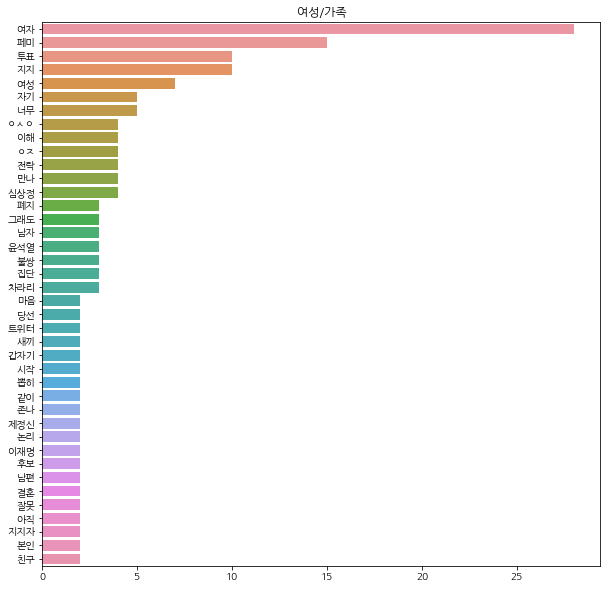

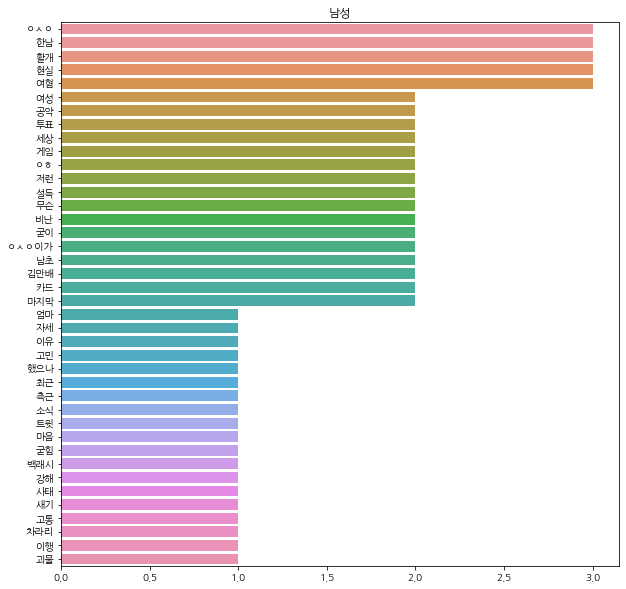

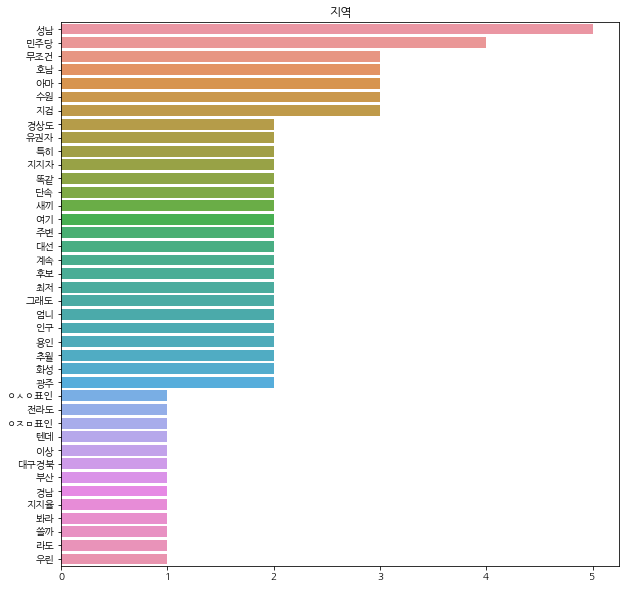

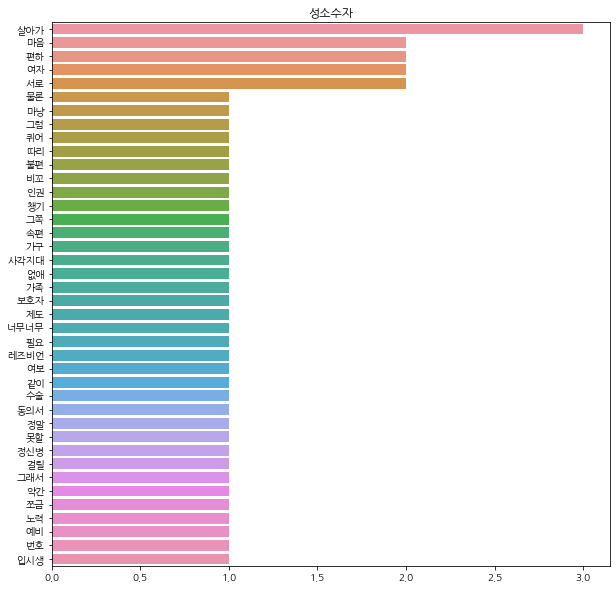

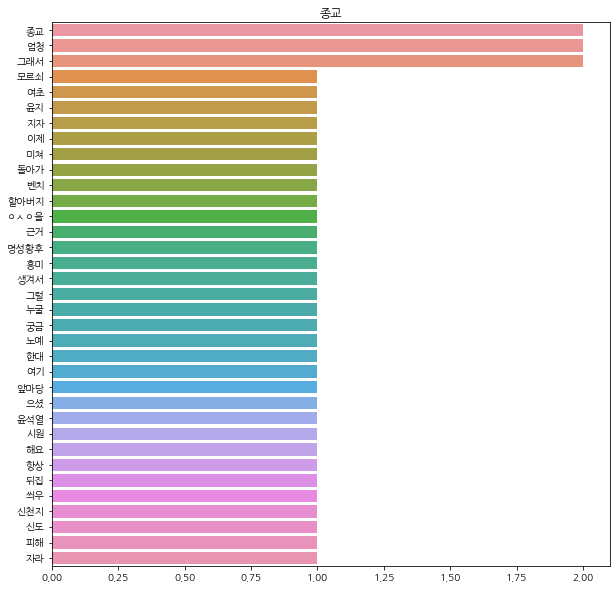

In [34]:
# 여성/가족, 남성, 지역, 성소수자, 종교
for c, t in zip(category, title):
    word_frequency(c, t)

In [35]:
def make_wordcloud(token, title): 
    n_corpus = []
    for t in token:
        for j in t:
            if j in same:
                j = 'ㅇㅈㅁ'
            elif j in same2:
                j = 'ㅇㅅㅇ'
            if j not in stopwords:
                n_corpus.append(j)
                    
    font_path = 'C:/Users/Erin/AppData/Local/Microsoft/Windows/Fonts/NanumGothic.ttf'
    wordcloud = WordCloud(font_path=font_path,
                background_color="black",
                stopwords=stopwords, 
                max_words=100, 
                #max_font_size=50, 
                width=500,
                height=500,
                random_state=1,
                scale=2).generate(' '.join(n_corpus))
    fig = plt.figure(1, figsize=(8,8)) 
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    #plt.axis('on')
    plt.show()   

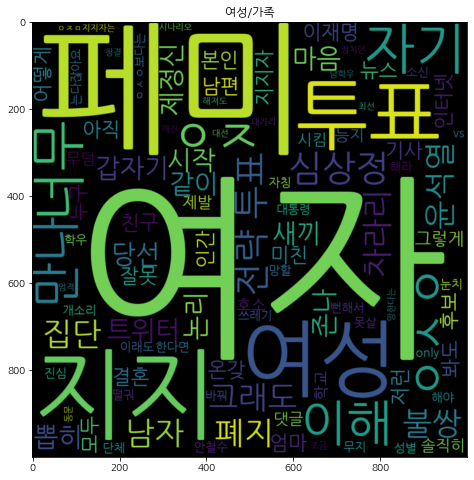

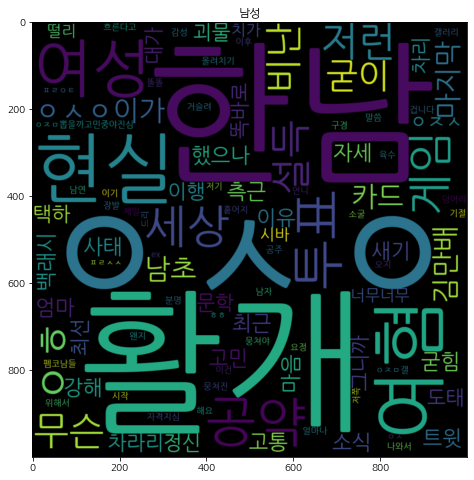

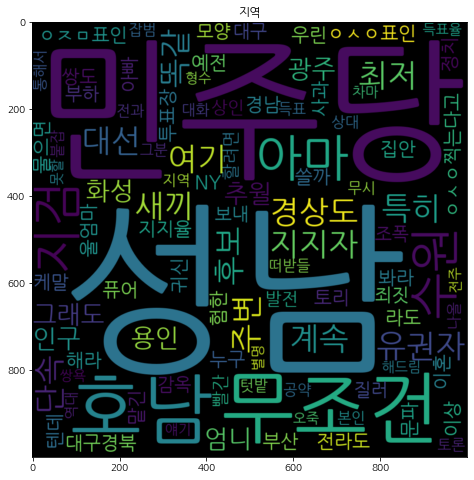

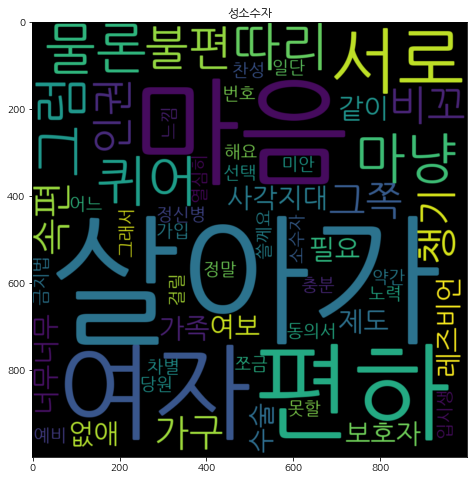

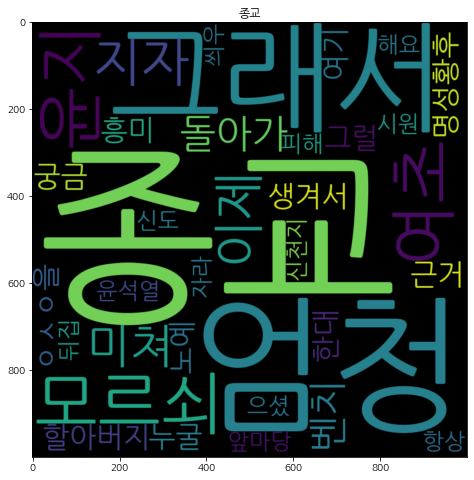

In [36]:
for c, t in zip(category, title):
    make_wordcloud(c, t)